## Workflow of a ML Project

In this practical session, we simulate the core steps involved in the workflow of a machine learning project; including problem framing, data collection, exploratory analysis, data pre-processing, training of the machine learning model and tuning.oratory analysis, data pre-processing, machine learning model training and tuning.

### 1. Problem Framing

Property buying and selling play a very important role in investment for many of us. The property market prices  are hard to predict due to the variable nature of auction and many other factors. In this project, we attempt to make use of recent historical transaction information to build a predictive model based on some features of properties, such as area, number of bedrooms, etc.

### 2. Data Collection

In this project, we use some historical information about properties sold from a website called Domain: https://www.domain.com.au/?mode=sold.

The relevant information about these properties is available in a comma-separated values file ('property-sold-price-hornsby.csv') and contains the following columns: 

#### Date | Address | Number of bedrooms | Number of bathrooms | Number of car parking | Land area | Sold price

**Task 1:** Read the csv file 'property-sold-price-hornsby.csv' into a dataframe, print the information about the dataframe and the content of the dataframe. Note that the csv file contains missing values ('?').

In [2]:
# Import Pandas
import pandas as pd
import IPython.display

# Read the csv file into a dataframe.
property_data = pd.read_csv('property-sold-price-hornsby.csv', header=0, na_filter=True, na_values='?')

# Print info about the dataframe.
property_data.info()

# Print the dataframe.
display(property_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             20 non-null     object 
 1   Address          20 non-null     object 
 2   # bedrooms       20 non-null     int64  
 3   # bathrooms      20 non-null     int64  
 4   # car parking    17 non-null     float64
 5   Land area (m2)   18 non-null     float64
 6   Sold price ($M)  20 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.2+ KB


,Date,Address,# bedrooms,# bathrooms,# car parking,Land area (m2),Sold price ($M)
0,8/07/2020,"2/76 Galston Road, Hornsby NSW 2077",4,2,1.0,581.0,1.180
1,29/07/2020,"18 Ethel Street, Hornsby NSW 2077",4,2,1.0,695.0,1.160
2,4/08/2020,"86 Old Berowra Road, Hornsby NSW 2077",3,1,NaN,NaN,1.100
3,4/08/2020,"28 Ethel Street, Hornsby NSW 207",4,2,1.0,705.0,1.280
4,4/08/2020,"257 Peats Ferry Road, Hornsby NSW 2077",5,3,2.0,926.0,1.925
5,7/07/2020,"47A Ida Street, Hornsby NSW 2077",3,2,1.0,470.0,1.150
6,27/06/2020,"21 Hall Road, Hornsby NSW 2077",3,2,2.0,695.0,1.285
7,25/06/2020,"16 Arrionga Place, Hornsby NSW 2077",5,4,NaN,1052.0,1.420
8,13/06/2020,"21 Pretoria Parade, Hornsby NSW 2077",3,2,2.0,878.0,1.545
9,12/06/2020,"46 Old Berowra Road, Hornsby NSW 2077",4,1,NaN,1117.0,1.520


### 3. Exploratory Analysis and Visualisation

**Task 2**: Show the statistical summary for each numerical attribute; including, COUNT, MEAN, STD, MIN, MAX, MEDIAN.

In [3]:
# Use the describe() method for the dataframe in Pandas.
property_data.describe()

,# bedrooms,# bathrooms,# car parking,Land area (m2),Sold price ($M)
count,20.000000,20.000000,17.000000,18.000000,20.000000
mean,3.750000,2.150000,1.882353,807.222222,1.348550
std,0.910465,0.812728,0.696631,175.973780,0.255865
min,2.000000,1.000000,1.000000,470.000000,0.980000
25%,3.000000,2.000000,1.000000,697.500000,1.177500
50%,4.000000,2.000000,2.000000,751.500000,1.277500
75%,4.250000,3.000000,2.000000,922.000000,1.445000
max,5.000000,4.000000,3.000000,1117.000000,1.925000


**Task 3** (optional): Plot the histogram for each numercial attribute.

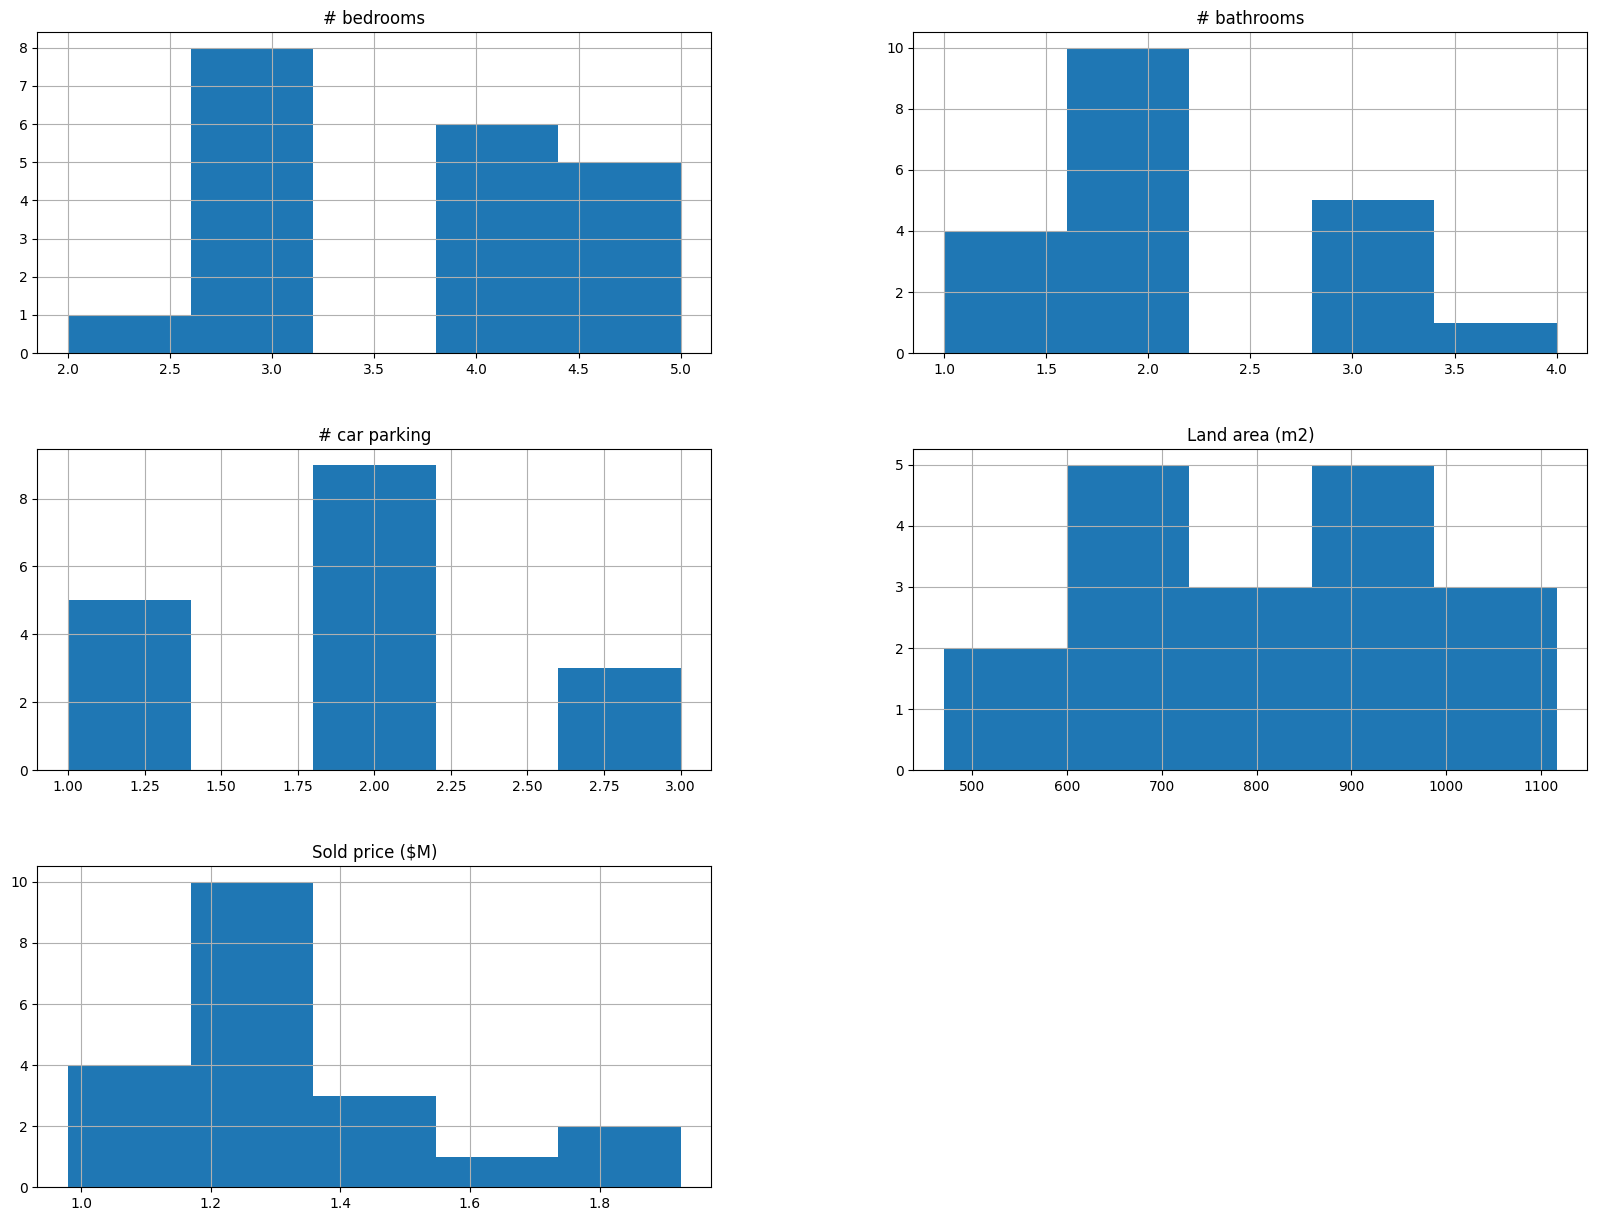

In [4]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Use the hist() method of the dataframe in Pandas.
property_data.hist(bins=5, figsize=(20, 15))
plt.show()

**Task 4**: Visualise the relationship between each feature and the feature "sold price", to study the correlation between the features and the property price.

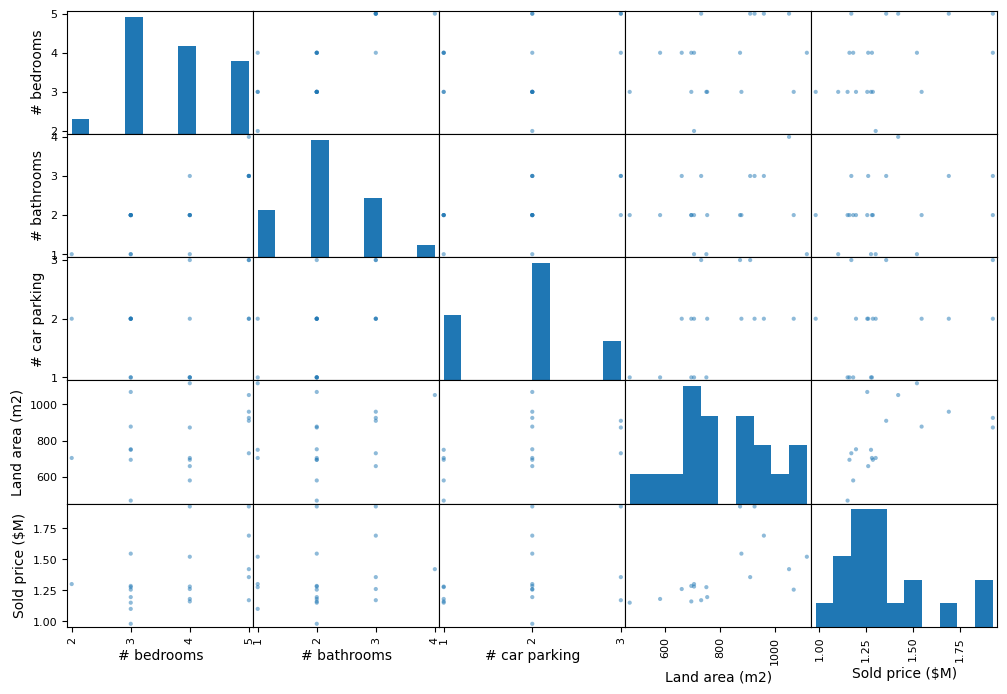

In [5]:
# Use a scatter plot with a feature as the X axis and the property price as the Y axis.
from pandas.plotting import scatter_matrix

attributes=["# bedrooms", "# bathrooms", "# car parking", "Land area (m2)", "Sold price ($M)"]
scatter_matrix(property_data[attributes], figsize =(12,8))
pass

### 4. Data Preprocessing

**Task 5**: Missing value imputation. The collected dataset has missing values, you need to handle the missing values by imputation. Refer to https://scikit-learn.org/stable/modules/impute.html#impute for details about how to do this in Scikit-learn.

In [10]:
# Handling missing values.
print('Before imputating missing values')
print(property_data.isnull().sum())

property_data["# car parking"].fillna(property_data["# car parking"].median(), inplace=True)
property_data["Land area (m2)"].fillna(property_data["Land area (m2)"].mean(), inplace=True)

# Display missing values before imputation.
print('After imputating missing values')

# Display missing values after imputation.
print(property_data.isnull().sum())


Before imputating missing values
Date               0
Address            0
# bedrooms         0
# bathrooms        0
# car parking      3
Land area (m2)     2
Sold price ($M)    0
dtype: int64
After imputating missing values
Date               0
Address            0
# bedrooms         0
# bathrooms        0
# car parking      0
Land area (m2)     0
Sold price ($M)    0
dtype: int64


### 5. Model Training
After pre-processing the data, we can choose and build machine learning models from the data. In our project, we will use a linear regression model to help predict a property price.

**Task 6**: To begin with, we just use a single feature (a.k.a., predictor or independent variable) and together with the property price to build a very simple linear regression model. Specifially, we use the Land Area feature for this purpose. In our case, the linear regression model is $y(w_0, w_1, x)=w_0+w_1x$. We need to learn $w_0$ and $w_1$ from the data. Refer to https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py for an example.

You need to execute the following steps:
1. Select the feature and the target attribute to create the dataset.
2. Split the data into a training dataset and a testing dataset. Given the small size of your collected dataset, you can just have one data instance in the testing dataset.
3. Build the linear regression model on the training dataset.
4. Test the model (you need to choose a performance measure, e.g., RMSE).
5. Visualise the learned model (essentially a regression line) together with the data instances.

Constructed dataset:
     Land area (m2)  Sold price ($M)
0       581.000000            1.180
1       695.000000            1.160
2       807.222222            1.100
3       705.000000            1.280
4       926.000000            1.925
5       470.000000            1.150
6       695.000000            1.285
7      1052.000000            1.420
8       878.000000            1.545
9      1117.000000            1.520
10      731.000000            1.170
11     1069.000000            1.255
12      873.000000            1.925
13      750.000000            1.275
14      660.000000            1.260
15      705.000000            1.300
16      910.000000            1.356
17      753.000000            1.195
18      960.000000            1.690
19      807.222222            0.980 

Testing data     Land area (m2)
18      960.000000
1       695.000000
19      807.222222
8       878.000000
Predicted values: 
 [[1.45413872]
 [1.28095927]
 [1.35429732]
 [1.40055112]] 

Mean squared error: 0.06
Root mea

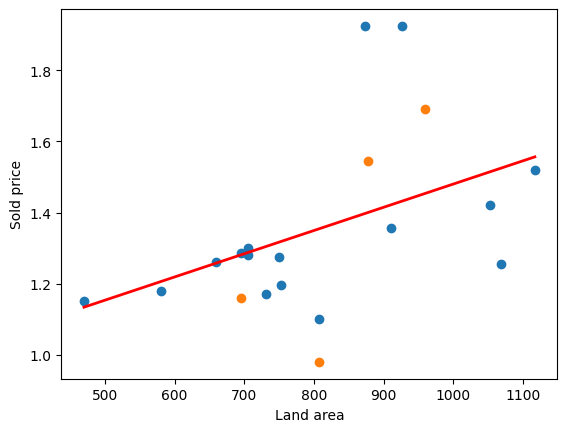

In [17]:
# Build, test, and visualize a simple linear regression model here.

# Here we will use 'Land area' as the selected feature.
property_data_area = property_data[["Land area (m2)", "Sold price ($M)"]]
print("Constructed dataset:\n", property_data_area, "\n")

# Specify features and the target.
X = property_data_area[['Land area (m2)']]
y = property_data_area[['Sold price ($M)']]

# Split the dataset into training data and testing data (1 testing data instance with setting test_size 1/20=0.05)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Testing data', X_test)
# Building the linear regression model on the training dataset.
from sklearn import linear_model as lm
lr_model = lm.LinearRegression()
lr_model.fit(X_train, y_train)

# Testing the model.
y_pred = lr_model.predict(X_test)
print("Predicted values: \n", y_pred, "\n")

import numpy as np

# Performance metrics: mean_squared error, r2_score (coefficient of determination).
from sklearn.metrics import mean_squared_error, r2_score

# Display the mean squared error.
MSE = mean_squared_error(y_test, y_pred)
print('Mean squared error: %.2f' %MSE)

# Display the root mean squared error.
RMSE = np.sqrt(MSE) 
print('Root mean squared error: %.2f' %RMSE)

# Display the coefficient of determination: 1 is perfect prediction.
print('Coefficient of determination: %.2f' %r2_score(y_test, y_pred))

# Plotting the model.
x_line = [X.min(), X.max()]
y_line = [lr_model.intercept_[0]+lr_model.coef_[0]*X.min(), lr_model.intercept_[0]+lr_model.coef_[0]*X.max()]

plt.plot(x_line, y_line, 'r', lw=2)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlabel('Land area')
plt.ylabel('Sold price')
plt.show()

**Task 7**: Build the linear regression model with multiple features. The single feature above might just offer limited information for the prediction. To improve the predication performance, we can include more features/predictors. However, our property features have different scales; therefore, we need to scale the features (using the MinMaxScaler). It is important to fit the scaler to the training features only, since anything you learn, must be learned from the model's training data. So, in this task, you are required to inlcude other features; such as the number of bedrooms, the number of bathrooms, and the number of car parking. Follow the same procedure as described above except the visualisation step. 

In [18]:
# Build and test the linear regression model with multiple features.

# We inculde all numeric features.
property_data_num = property_data[attributes]

# Specify features and the target.
X = property_data_num.drop("Sold price ($M)", axis='columns')
y = property_data_num[["Sold price ($M)"]]

# Split the dataset into training data and testing data (1 testing data instance with setting test_size 1/20=0.05).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# print("Testing data: ", X_test)

# Import the MinMaxScaler and make_pipeline.
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

# Create a linear regression model using a pipeline.
lr_model_multi = make_pipeline(MinMaxScaler(), lm.LinearRegression())

# Fit the model on training data.
lr_model_multi.fit(X_train, y_train)

# Test the model.
y_pred = lr_model_multi.predict(X_test)
print("Predicted values: \n", y_pred)

# Display the mean squared error.
MSE = mean_squared_error(y_test, y_pred)
print('Mean squared error: %.2f' %MSE)

# Display the root mean squared error.
RMSE = np.sqrt(MSE) 
print('Root mean squared error: %.2f' %RMSE)

# Display coefficient of determination: 1 is perfect prediction.
print('Coefficient of determination: %.2f' %r2_score(y_test, y_pred))

Predicted values: 
 [[1.50429901]
 [1.29226156]
 [1.28206692]
 [1.31161526]]
Mean squared error: 0.05
Root mean squared error: 0.22
Coefficient of determination: 0.39


### 6. Model Fine-tuning

**Task 8**: Use 5-fold cross validation to train the model and report the averaged testing error. 

In [19]:
# Apply 5-fold cross validation to report a more robust testing error.

from sklearn.model_selection import cross_val_score

reg = lm.LinearRegression()

scores_reg = cross_val_score(reg, X, y, cv=5, scoring='r2', verbose=1)

print('Coefficient of determination: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores_reg.min(), scores_reg.max(), scores_reg.mean(), scores_reg.std()))


Coefficient of determination: [-10.0532, 0.2520]; mean: -2.5261; std: 3.8736



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
